## Problem Statement:

Analysing Patterns present in the data using EDA to ensure that the applicants capable of repaying the loan are not rejected.

There are Two types of risks associated with the bank’s decision, When it receives a loan application:
   - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
   - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The Aim is to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as 
   - denying the loan, 
   - reducing the amount of loan, 
   - lending (to risky applicants) at a higher interest rate, etc. 

To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  

In [1]:
#Import Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

### Data Inspection

In [3]:
#Reading the dataset application_data.csv in df1
df1 = pd.read_csv('application_data.csv')
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Reading the dataset previous_application.csv in df2
df2 = pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dimensions for df1
df1.shape

(307511, 122)

In [6]:
#Dimensions for df2
df2.shape

(1670214, 37)

In [7]:
#Checking the Column Data Types for df1, by setting verbose=True it will give us the full summary (i.e. info on all the columns)
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#Checking the Column Data Types for df2
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
#Checking the statistical information for all numeric variables in df1
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
#Checking the statistical information for all numeric variables in df2
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning

#### Data Cleaning for df1:
1. Handling Null Values in df1

In [11]:
# Finding the %age of null values in each column

(df1.isnull().sum()/df1.shape[0]*100).sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [12]:
# Checking the columns with null values equal to or more than 40%
df1.loc[:,df1.isnull().sum()/df1.shape[0]*100 >= 40]

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,NaN,0.083037,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No
1,NaN,0.311267,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.145570,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,...,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No
307507,NaN,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,...,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No
307508,NaN,0.744026,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,...,NaN,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No
307509,NaN,NaN,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,...,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No


In [13]:
# Dropping the columns with null values equal to or more than 40%
df1 = df1.loc[:,df1.isnull().sum()/df1.shape[0]*100 < 40]
df1.shape

(307511, 73)

In [14]:
#Checking to confirm that the columns with null values >40% are dropped
(df1.isnull().sum()/df1.shape[0]*100).sort_values(ascending=False).head(40)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [15]:
#Checking the columns with less than 13% null values
df1.loc[:,(df1.isnull().sum()/df1.shape[0]*100 < 13) & (df1.isnull().sum()/df1.shape[0]*100 > 0)]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,1.0,0.681632,0.0,0.0,0.0,0.0,-273.0
307507,12001.5,225000.0,Unaccompanied,1.0,0.115992,0.0,0.0,0.0,0.0,0.0
307508,29979.0,585000.0,Unaccompanied,1.0,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,20205.0,319500.0,Unaccompanied,2.0,0.514163,0.0,0.0,0.0,0.0,-322.0


2. Imputing the null values with mean/median/mode values
- AMT_ANNUITY Column

In [16]:
# Checking the AMT_ANNUITY Column
df1['AMT_ANNUITY'].isnull().sum()

12

In [17]:
df1['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

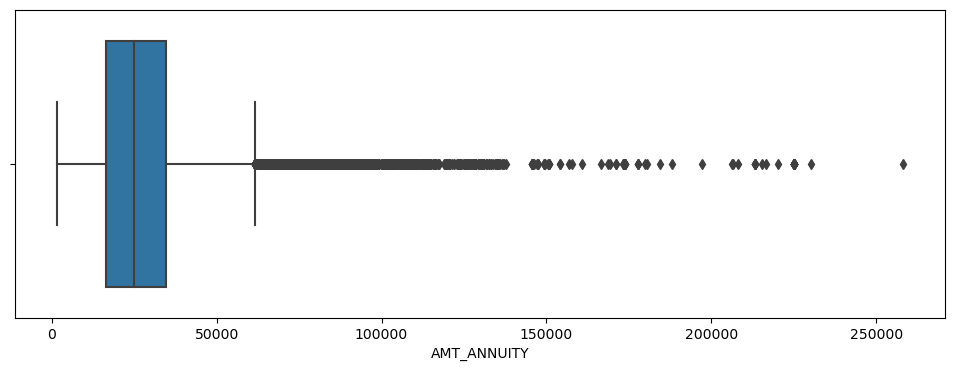

In [18]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['AMT_ANNUITY'])
plt.show()

In [19]:
df1['AMT_ANNUITY'].median()

24903.0

In [20]:
#Imputing the missing values in AMT_ANNUITY using the median value
df1.AMT_ANNUITY.fillna(df1['AMT_ANNUITY'].median(),inplace=True)

In [21]:
#Checking to confirm that null values are replaced
df1['AMT_ANNUITY'].isnull().sum()

0

- AMT_GOODS_PRICE Column

In [22]:
# Checking the AMT_GOODS_PRICE Column
df1['AMT_GOODS_PRICE'].isnull().sum()

278

In [23]:
df1['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

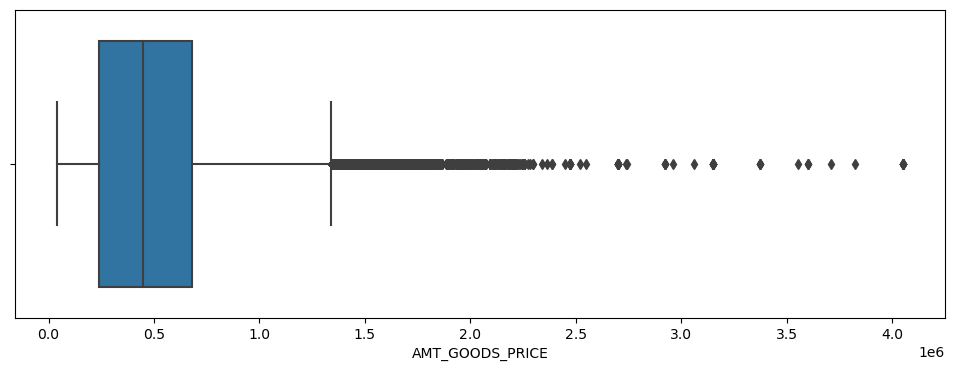

In [24]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['AMT_GOODS_PRICE'])
plt.show()

In [25]:
df1['AMT_GOODS_PRICE'].median()

450000.0

In [26]:
#Imputing the missing values in AMT_GOODS_PRICE using the median value
df1.AMT_GOODS_PRICE.fillna(df1['AMT_GOODS_PRICE'].median(),inplace=True)

In [27]:
#Checking to confirm that null values are replaced
df1['AMT_GOODS_PRICE'].isnull().sum()

0

- NAME_TYPE_SUITE Column

In [28]:
# Checking the NAME_TYPE_SUITE Column
df1['NAME_TYPE_SUITE'].isnull().sum()

1292

In [29]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
#NAME_TYPE_SUITE column is a categorical column so, hence finding the mode value
df1['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [31]:
#Imputing the missing values in NAME_TYPE_SUITE using the mode value
df1.NAME_TYPE_SUITE.fillna(df1['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [32]:
#Checking to confirm that null values are replaced
df1['NAME_TYPE_SUITE'].isnull().sum()

0

- CNT_FAM_MEMBERS Column

In [33]:
#Checking the CNT_FAM_MEMBERS column
df1['CNT_FAM_MEMBERS'].isnull().sum()

2

In [34]:
df1['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

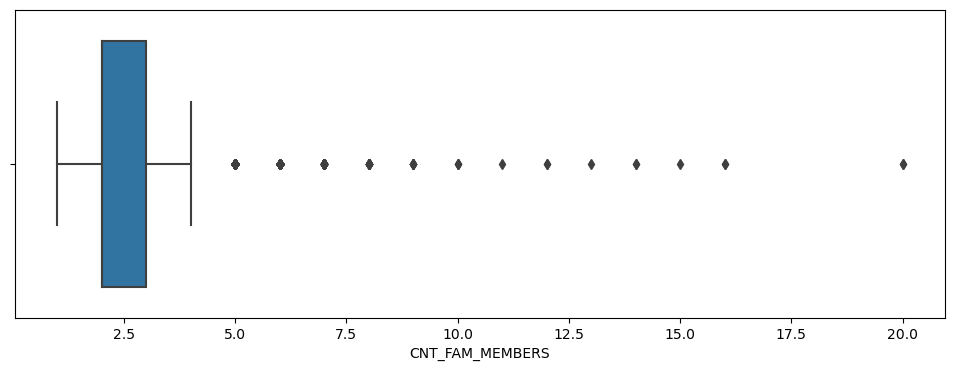

In [35]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['CNT_FAM_MEMBERS'])
plt.show()

In [36]:
df1['CNT_FAM_MEMBERS'].median()

2.0

In [37]:
#Imputing the missing values in CNT_FAM_MEMBERS using the median value
df1.CNT_FAM_MEMBERS.fillna(df1['CNT_FAM_MEMBERS'].median(),inplace=True)

In [38]:
#Checking to confirm that null values are replaced
df1['CNT_FAM_MEMBERS'].isnull().sum()

0

- OBS_30_CNT_SOCIAL_CIRCLE Column

In [39]:
# Checking the OBS_30_CNT_SOCIAL_CIRCLE Column
df1['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [40]:
df1['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

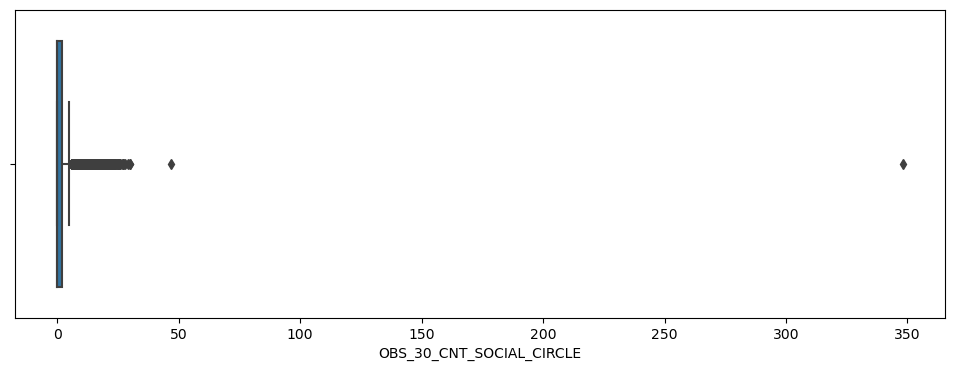

In [41]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [42]:
df1['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [43]:
#Imputing the missing values in OBS_30_CNT_SOCIAL_CIRCLE using the median value
df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [44]:
#Checking to confirm that null values are replaced
df1['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

- DEF_30_CNT_SOCIAL_CIRCLE Column

In [45]:
# Checking the DEF_30_CNT_SOCIAL_CIRCLE Column
df1['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [46]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

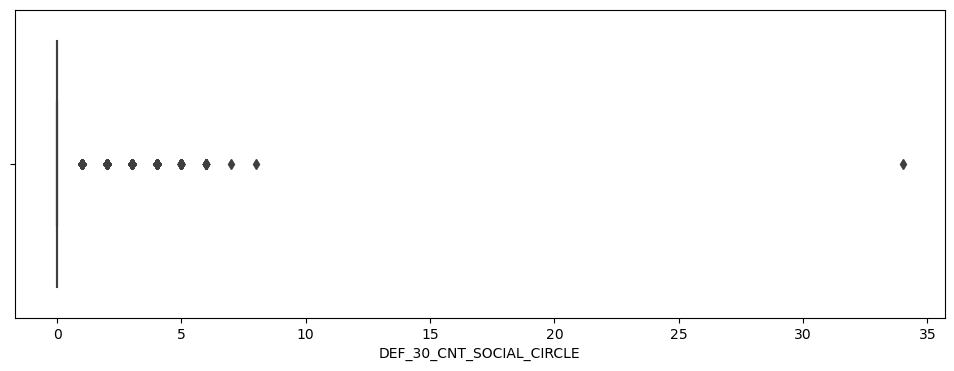

In [47]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [48]:
df1['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [49]:
#Imputing the missing values in DEF_30_CNT_SOCIAL_CIRCLE using the median value
df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df1['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [50]:
#Checking to confirm that null values are replaced
df1['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

- OBS_60_CNT_SOCIAL_CIRCLE Column

In [51]:
# Checking the OBS_60_CNT_SOCIAL_CIRCLE Column
df1['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [52]:
df1['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

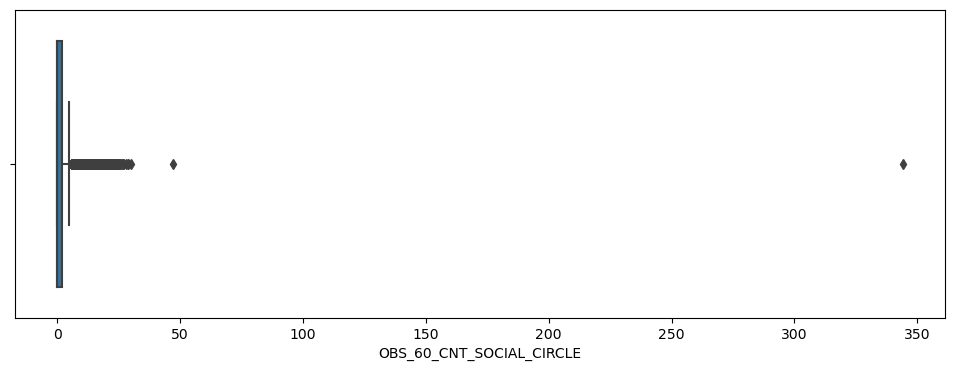

In [53]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [54]:
df1['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [55]:
#Imputing the missing values in OBS_60_CNT_SOCIAL_CIRCLE using the median value
df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [56]:
#Checking to confirm that null values are replaced
df1['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

- DEF_60_CNT_SOCIAL_CIRCLE Column

In [57]:
# Checking the DEF_60_CNT_SOCIAL_CIRCLE Column
df1['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [58]:
df1['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

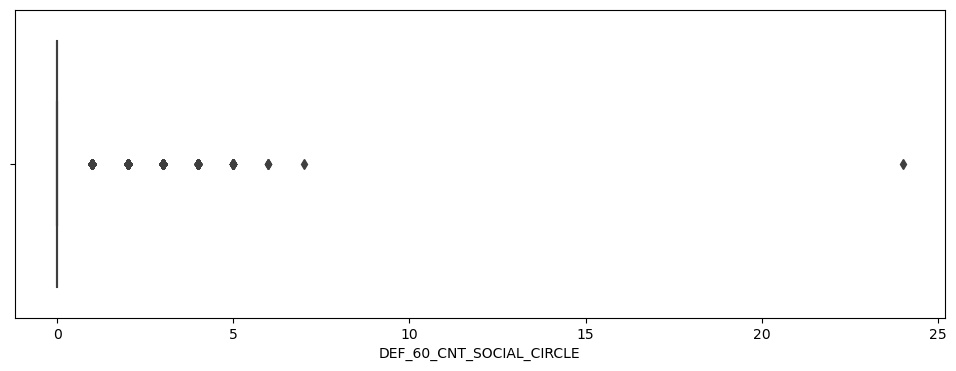

In [59]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df1['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [60]:
df1['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [61]:
#Imputing the missing values in DEF_60_CNT_SOCIAL_CIRCLE using the median value
df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df1['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [62]:
#Checking to confirm that null values are replaced
df1['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

- EXT_SOURCE Columns

<AxesSubplot:>

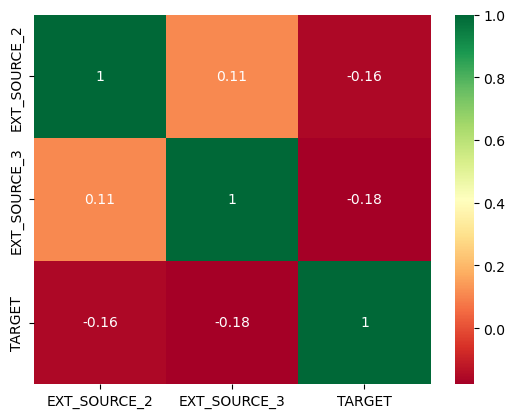

In [63]:
#We have dropped EXT_SOURCE_1 due to having null values > 40%

#Checking correlation of EXT_SOURCE_2 & EXT_SOURCE_3 vs TARGET column 
sns.heatmap(df1[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]].corr(),annot = True,cmap ="RdYlGn")

In [64]:
#There is no correlation between EXT_SOURCE_2, EXT_SOURCE_3 and target column, hence we can drop these columns as well
df1 = df1.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

In [65]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- DAYS Columns - Converting Negative Values

In [66]:
# Finding all the columns starting with DAYS.
days_cols = [col for col in df1 if col.startswith('DAYS')]
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [67]:
#Checking for negative values in above columns
print(df1['DAYS_BIRTH'].unique())
print(df1['DAYS_EMPLOYED'].unique())
print(df1['DAYS_REGISTRATION'].unique())
print(df1['DAYS_ID_PUBLISH'].unique())
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [68]:
#Converting negative values to absolute using the abs() function
df1[days_cols] = abs(df1[days_cols])

In [69]:
#Checking if negative values are converted
print(df1['DAYS_BIRTH'].unique())
print(df1['DAYS_EMPLOYED'].unique())
print(df1['DAYS_REGISTRATION'].unique())
print(df1['DAYS_ID_PUBLISH'].unique())
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


- DAYS_LAST_PHONE_CHANGE Column

In [70]:
#Checking the DAYS_LAST_PHONE_CHANGE
df1['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [71]:
df1['DAYS_LAST_PHONE_CHANGE'].value_counts()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
4051.0        1
3593.0        1
3622.0        1
3570.0        1
3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [72]:
df1['DAYS_LAST_PHONE_CHANGE'].mode()[0]

0.0

In [73]:
#Imputing the missing values in DAYS_LAST_PHONE_CHANGE using the mode value
df1.DAYS_LAST_PHONE_CHANGE.fillna(df1['DAYS_LAST_PHONE_CHANGE'].mode()[0],inplace=True)

In [74]:
#Checking to confirm that null values are replaced
df1['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

- FLAG_DOCUMENT Columns

In [75]:
# Finding all the columns starting with FLAG_DOCUMENT.
flag_cols = [col for col in df1 if col.startswith('FLAG_DOCUMENT')]
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

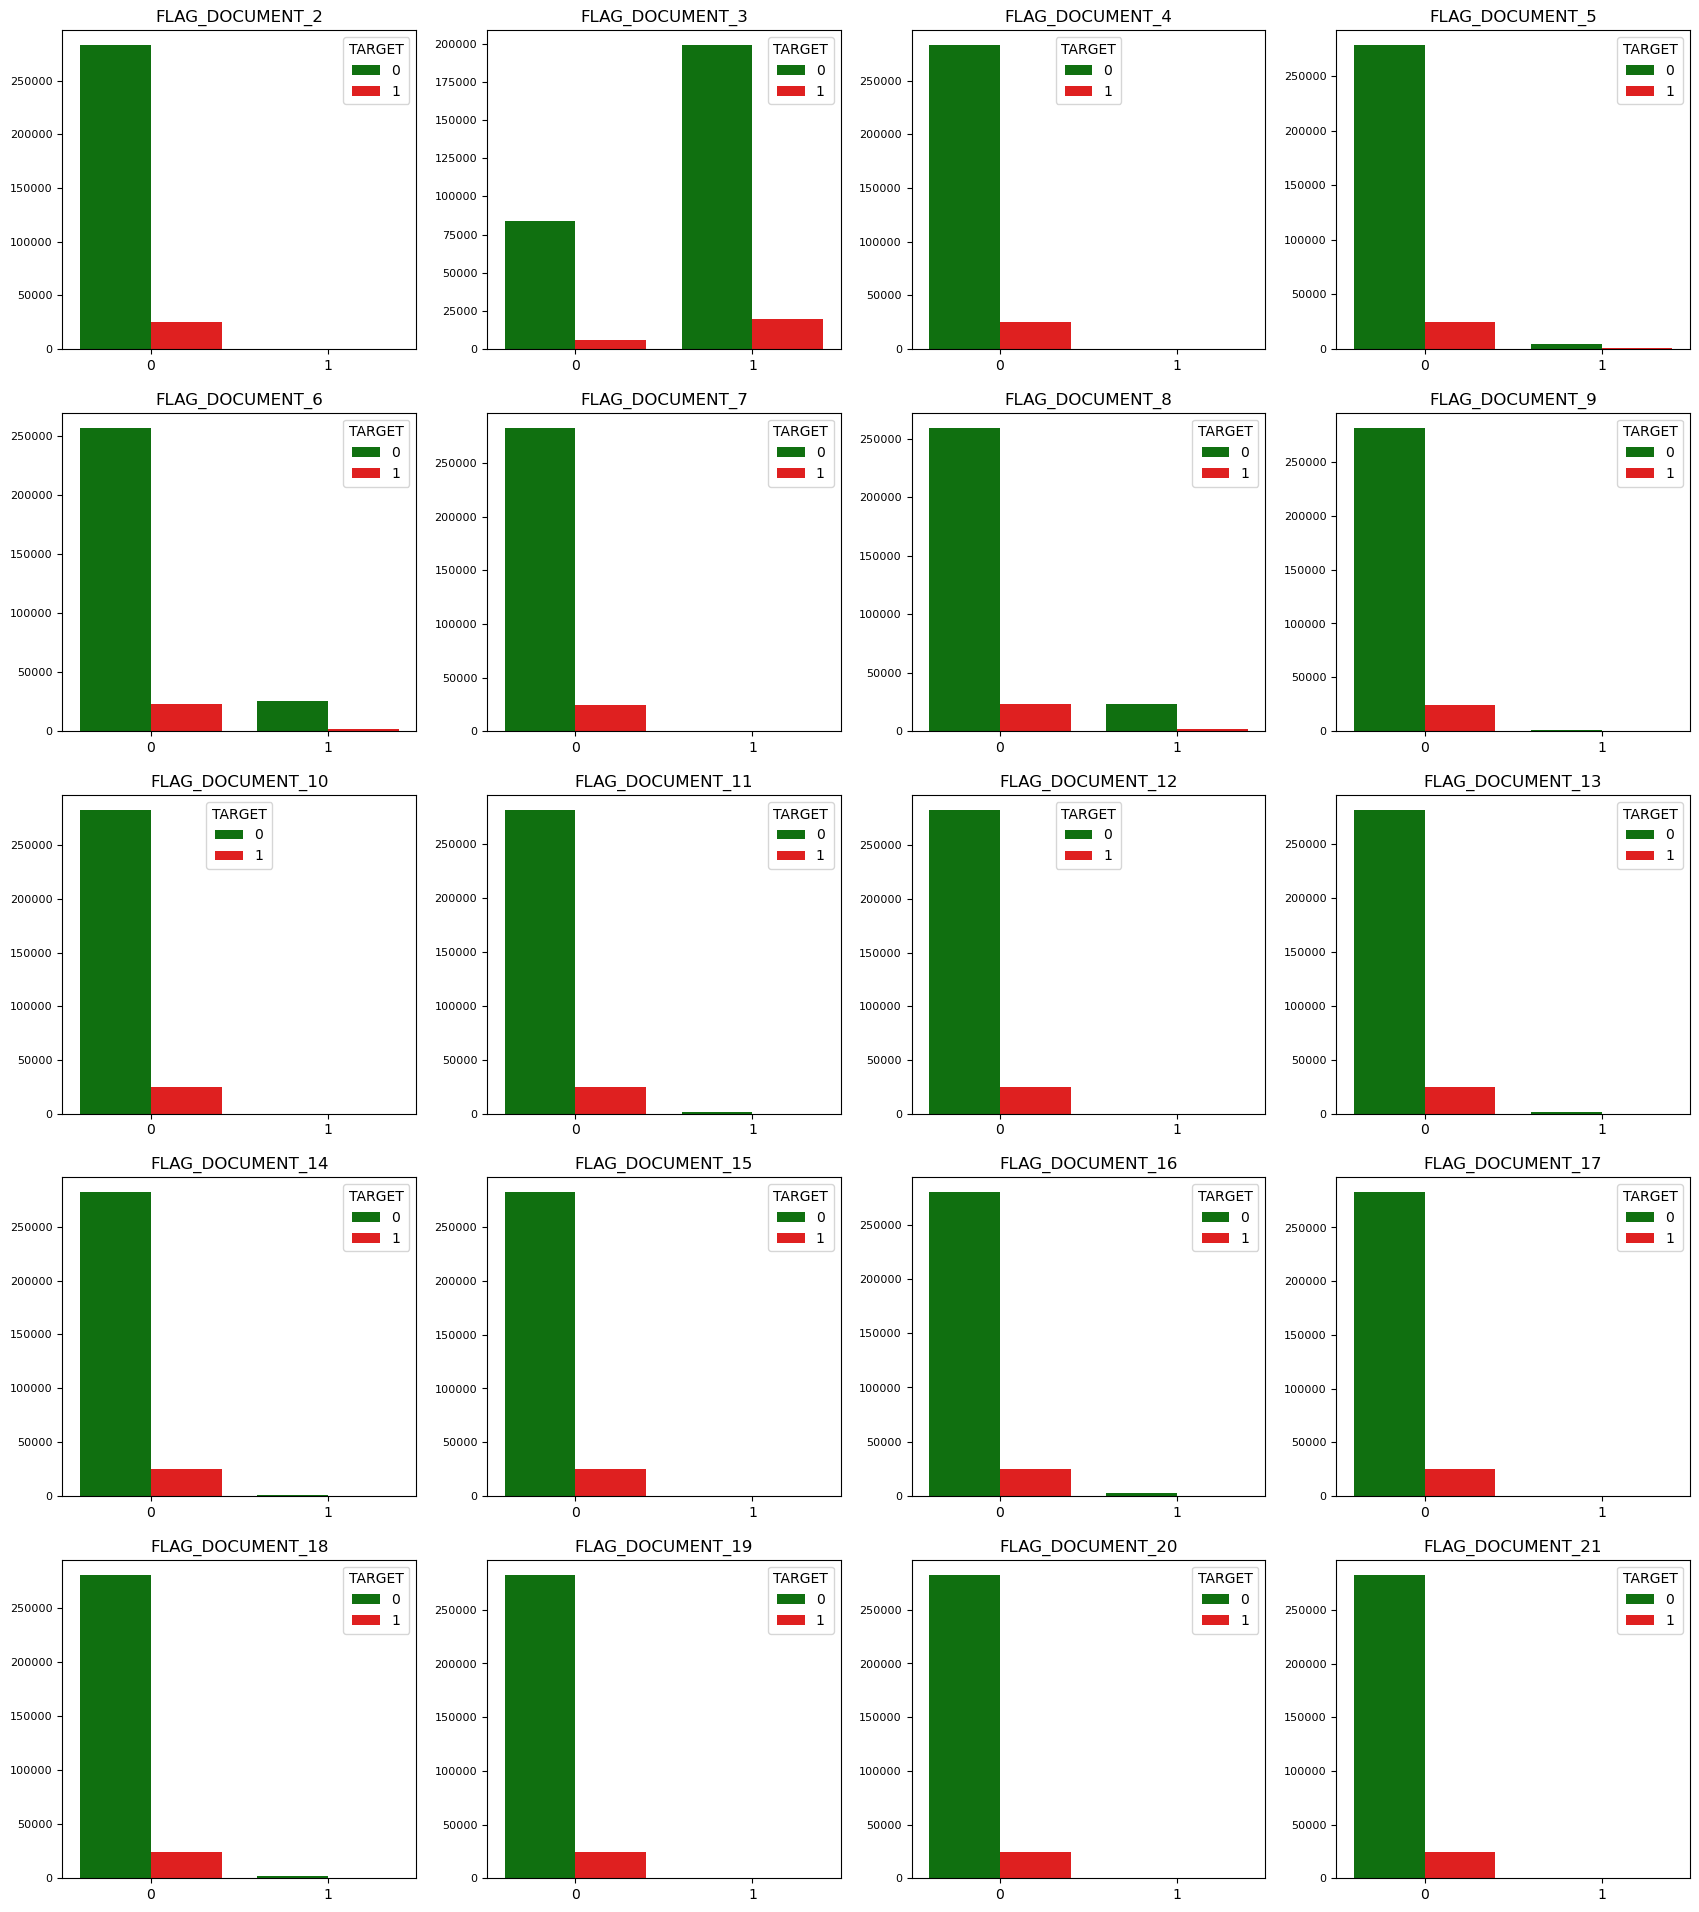

In [76]:
#Checking the relevance of Flag_Document and whether it has any relation with Target Column

df_flag = df1[flag_cols+["TARGET"]]
length = len(flag_cols)
plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_cols,range(length)):
    plt.subplot(5,4,j+1)
    sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["g","r"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Notes** - Except for FLAG_DOCUMENT_3 in most cases client has not provided the other FLAG_DOCUMENT. Data shows if applicant has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [77]:
#Except for FLAG_DOCUMENT_3, dropping the rest of the columns. 

flag_cols.remove('FLAG_DOCUMENT_3')
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [78]:
df1 = df1.drop(flag_cols, axis=1)

In [79]:
#Checking if the flag_cols are dropped
df1.shape

(307511, 52)

- Mobile, Phone, Email Columns

<AxesSubplot:>

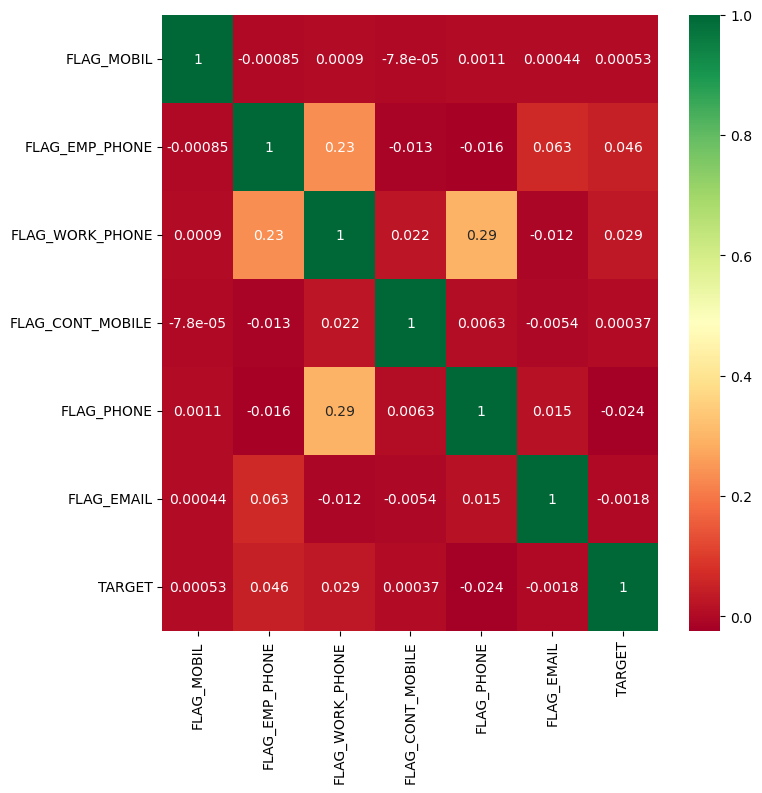

In [80]:
# checking is there is any correlation between mobile phone, work phone, home phone, email columns and Target Column

contact_corr = df1[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']].corr()
fig = plt.figure(figsize=(8,8))
sns.heatmap(contact_corr, annot = True, cmap ="RdYlGn")

**Notes** - There is no correlation between mobile phone, work phone, home phone, email columns and Target Column, thus these columns can be deleted

In [81]:
#Dropping the phone & email columns
df1 = df1.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)
df1.shape

(307511, 46)

In [82]:
# Inspecting the column types after removal of unnecessary columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [83]:
#Checking for any remaining null values
(df1.isnull().sum()/df1.shape[0]*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
LIVE_CITY_NOT_WORK_CITY         0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
ORGANIZATION_TYPE               0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
FLAG_DOCUMENT_3                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
SK_ID_CURR                      0.000000
TARGET          

- OCCUPATION_TYPE Column - Imputing null values with a new category as assigning to any existing category might influence the analysis

In [84]:
#Imputing null values in OCCUPATION_TYPE to Unknown category
df1['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [85]:
#Checking to confirm that null values are replaced
df1['OCCUPATION_TYPE'].isnull().sum()

0

- AMT_REQ_CREDIT_BUREAU Columns

In [86]:
df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [87]:
#Imputing with median as mean has decimals and this is the number of enquiries
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    df1[col].fillna(df1[col].median(),inplace = True)

In [88]:
#Checking for any remaining null values
df1.isnull().sum()/df1.shape[0]*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_

3. Standardising Values - Binning Numerical Columns to create a categorical column

In [89]:
# Creating bins for income amount
df1['AMT_INCOME_TOTAL']=df1['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [90]:
#checking the binning of data and % of data in each category
df1['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [91]:
# Creating bins for Credit amount
df1['AMT_CREDIT']=df1['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=slots)

In [92]:
#checking the binning of data and % of data in each category
df1['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [93]:
# Creating bins for Age
df1['AGE'] = df1['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

df1['AGE_GROUP']=pd.cut(df1['AGE'],bins=bins,labels=slots)

In [94]:
#checking the binning of data and % of data in each category
df1['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

In [95]:
# Creating bins for Employement Time
df1['YEARS_EMPLOYED'] = df1['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df1['EMPLOYMENT_YEAR']=pd.cut(df1['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [96]:
#checking the binning of data and % of data in each category
df1['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

In [97]:
#Checking the number of unique values each column possess to identify categorical columns
df1.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

4. Data Type Conversion

In [98]:
# inspecting the column types if they are in correct data type using the above result
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [99]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                       'REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    df1[col] =pd.Categorical(df1[col])

In [100]:
# Inspecting the column types if the above conversion is reflected
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### Data Cleaning for Df2:
1. Handling Null Values in df2

In [101]:
# Finding the %age of null values in each column
(df2.isnull().sum()/df2.shape[0]*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [102]:
# Checking the columns with null values equal to or more than 40%
df2.loc[:,df2.isnull().sum()/df2.shape[0]*100 >= 40]

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0.0,0.000000,0.182832,0.867336,NaN,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,NaN,NaN,NaN,NaN,Unaccompanied,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,NaN,NaN,NaN,NaN,"Spouse, partner",365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,NaN,NaN,NaN,NaN,NaN,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1670209,0.0,0.000000,NaN,NaN,NaN,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,29250.0,0.340554,NaN,NaN,Unaccompanied,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,10525.5,0.101401,NaN,NaN,"Spouse, partner",365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,NaN,NaN,NaN,NaN,Family,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [103]:
# Dropping the columns with null values equal to or more than 40%
df2 = df2.loc[:,df2.isnull().sum()/df2.shape[0]*100 < 40]
df2.shape

(1670214, 26)

In [104]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [105]:
#Dropping Unnecessary columns
df2 = df2.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1)

In [106]:
# Inspecting the column types after after removal of unnecessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

2. Imputing Null Values

In [107]:
# checking the null value % of each column in df2
(df2.isnull().sum()/df2.shape[0]*100).sort_values(ascending=False)

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

- AMT_GOODS_PRICE Column

In [108]:
# Checking the AMT_GOODS_PRICE Column
df2['AMT_GOODS_PRICE'].isnull().sum()

385515

In [109]:
df2['AMT_GOODS_PRICE'].value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

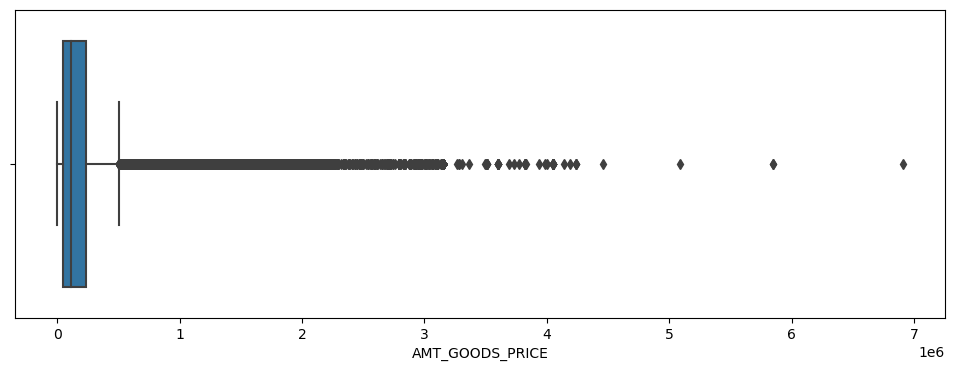

In [110]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df2['AMT_GOODS_PRICE'])
plt.show()

In [111]:
df2['AMT_GOODS_PRICE'].mode()[0]

45000.0

In [112]:
#Imputing the missing values in AMT_GOODS_PRICE using the mode value
df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [113]:
#Checking to confirm that null values are replaced
df2['AMT_GOODS_PRICE'].isnull().sum()

0

- AMT_ANNUITY Column

In [114]:
# Checking the AMT_ANNUITY Column
df2['AMT_ANNUITY'].isnull().sum()

372235

In [115]:
df2['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

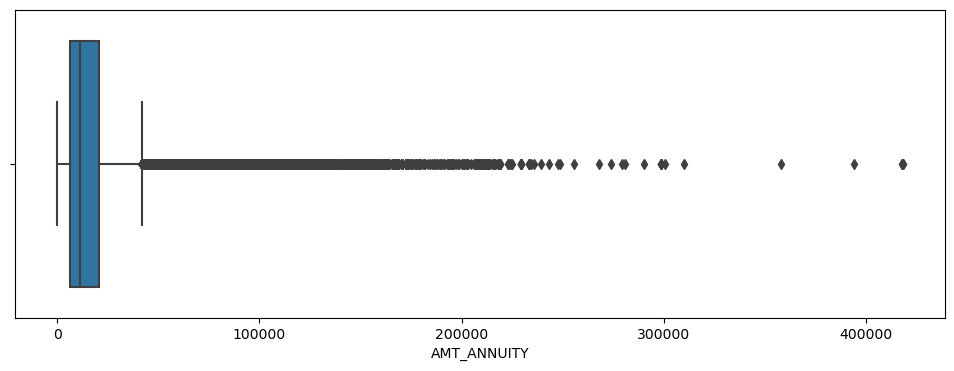

In [116]:
#Checking for Outliers using boxplot
plt.figure(figsize=(12,4))
sns.boxplot(df2['AMT_ANNUITY'])
plt.show()

In [117]:
df2['AMT_ANNUITY'].median()

11250.0

In [118]:
#Imputing the missing values in AMT_ANNUITY using the median value
df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median, inplace=True)

In [119]:
#Checking to confirm that null values are replaced
df2['AMT_ANNUITY'].isnull().sum()

0

- CNT_PAYMENT Column

In [120]:
# Checking the CNT_PAYMENT Column
df2['CNT_PAYMENT'].isnull().sum()

372230

In [121]:
df2.loc[df2['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

**Notes** - Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [122]:
#Imputing null values with 0
df2['CNT_PAYMENT'].fillna(0,inplace = True)

In [123]:
#Checking to confirm that null values are replaced
df2['CNT_PAYMENT'].isnull().sum()

0

In [124]:
# checking the null value % of each column in df2
(df2.isnull().sum()/df2.shape[0]*100).sort_values(ascending=False)

PRODUCT_COMBINATION       0.020716
AMT_CREDIT                0.000060
NAME_CLIENT_TYPE          0.000000
NAME_YIELD_GROUP          0.000000
CNT_PAYMENT               0.000000
NAME_SELLER_INDUSTRY      0.000000
SELLERPLACE_AREA          0.000000
CHANNEL_TYPE              0.000000
NAME_PRODUCT_TYPE         0.000000
NAME_PORTFOLIO            0.000000
NAME_GOODS_CATEGORY       0.000000
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_PAYMENT_TYPE         0.000000
DAYS_DECISION             0.000000
NAME_CONTRACT_STATUS      0.000000
NAME_CASH_LOAN_PURPOSE    0.000000
AMT_GOODS_PRICE           0.000000
AMT_APPLICATION           0.000000
AMT_ANNUITY               0.000000
NAME_CONTRACT_TYPE        0.000000
CODE_REJECT_REASON        0.000000
dtype: float64

**Notes** - We can ignore the null values in the PRODUCT_COMBINATION column as this percentage is very less.

3. Standardising Values for df2

In [125]:
#Checking the number of unique values each column possess to identify categorical columns
df2.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357960
SK_ID_PREV                1670214
dtype: int64

In [126]:
# inspecting the column types of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  object 
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [127]:
#Converting negative days to positive days 
df2['DAYS_DECISION'] = abs(df2['DAYS_DECISION'])

In [128]:
#Creating Categorical bins for DAYS_DECISION
df2['DAYS_DECISION_GROUP'] = (df2['DAYS_DECISION']-(df2['DAYS_DECISION'] % 400)).astype(str) +'-'+ ((df2['DAYS_DECISION'] - (df2['DAYS_DECISION'] % 400)) + (df2['DAYS_DECISION'] % 400) + (400 - (df2['DAYS_DECISION'] % 400))).astype(str)

In [129]:
df2['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

4. Data Type Conversion 

In [130]:
#Converting Categorical columns from Object to categorical 
Catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                    'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col:
    df2[col] =pd.Categorical(df2[col])

In [131]:
# Inspecting the column types after conversion
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  object  
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

### Data Analysis

In [132]:
# Checking Data Imbalance for TARGET Column

val = df1['TARGET'].value_counts(normalize=True)*100
val

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

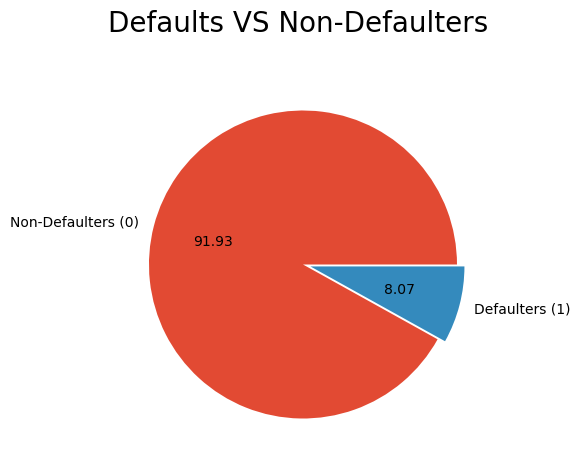

In [133]:
plt.figure(figsize=[7,5])
plt.style.use('ggplot')
plt.pie(val, labels=['Non-Defaulters (0)', 'Defaulters (1)'],explode=(0,0.05), autopct='%.2f')
plt.title('Defaults VS Non-Defaulters \n', fontsize=20) 
plt.show()

#### Categorical Variables Analysis

In [134]:
# function for plotting repetitive countplots in univariate categorical analysis on df1

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df1[feature].value_counts()
    df = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    cat_perc = df1[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18,22))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, x = feature, data=df1, hue ="TARGET", order=cat_perc[feature], palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Non-Defaulter','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,  x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc, palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 

    plt.show();

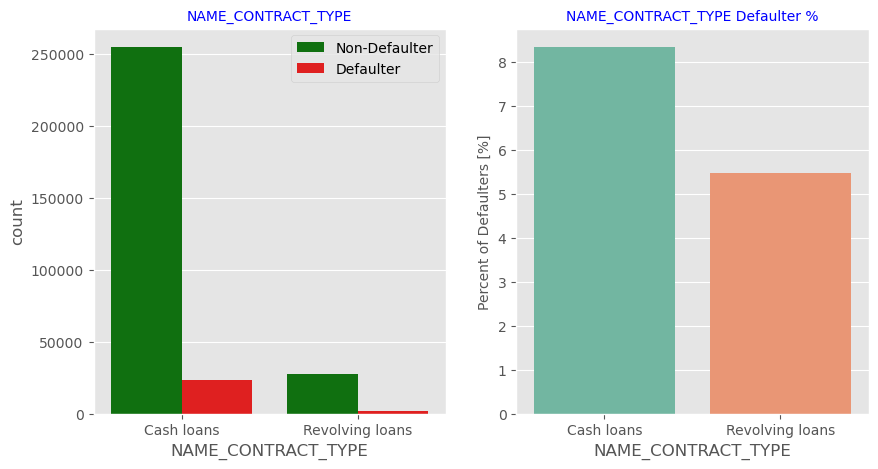

In [135]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE')

Notes - Revolving loans contribute a small fraction from the total number of loans while Majority are Cash Loans ; but a larger amount of Revolving loans, comparing with their frequency, are not repaid.

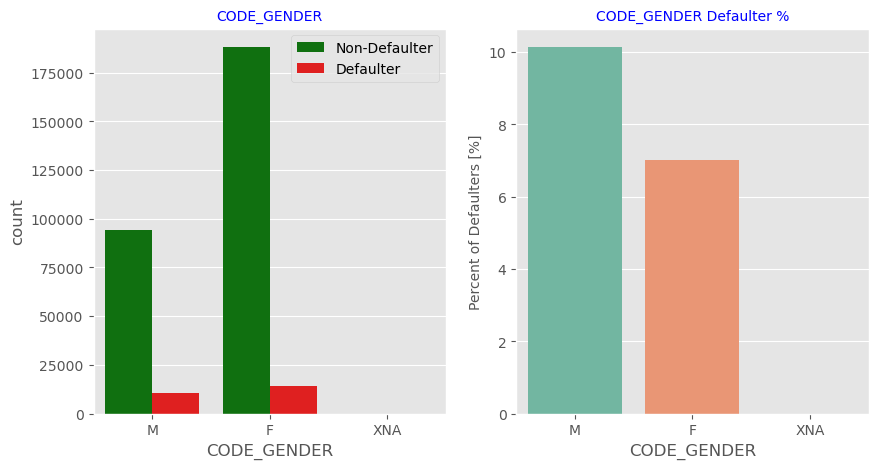

In [136]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

Notes - The number of female clients is almost double the number of male clients. Based on the percentage of defaulters, males are more likely to default in repaying their loans (10%), in comparison with women (7%)

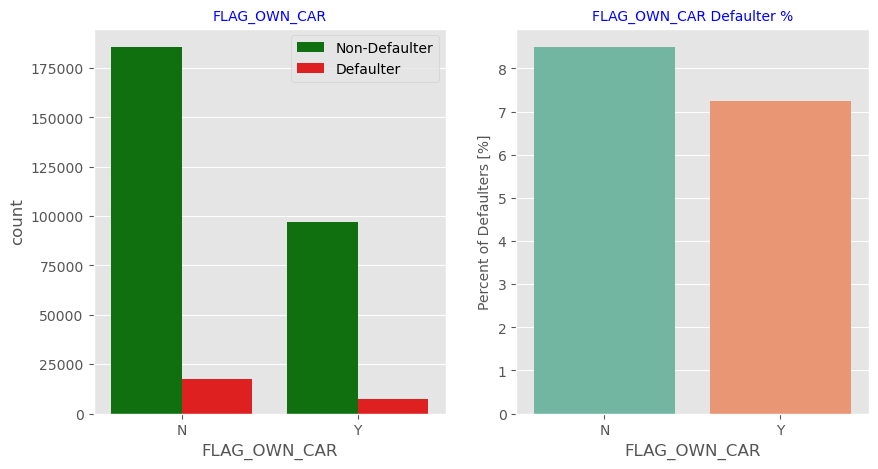

In [137]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

Notes - Number of Clients who dont own a car are double in comparison to those who own a car. But based on the percentage of default, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

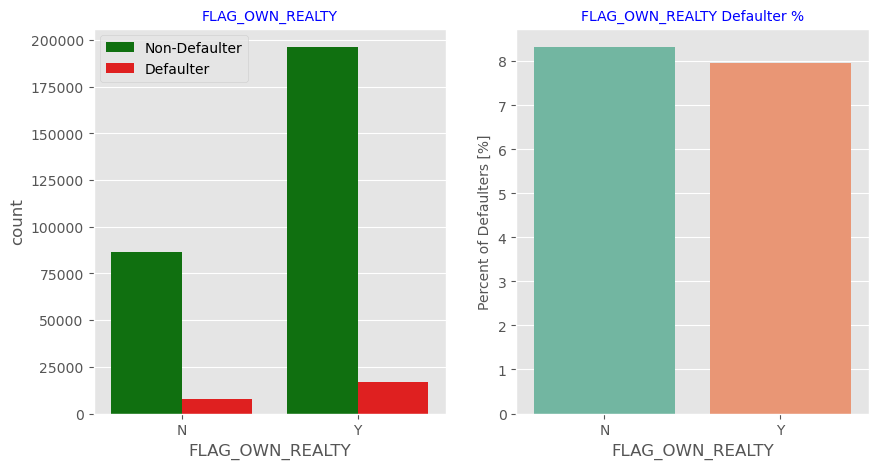

In [138]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

Notes - The clients who own real estate are more than double of the ones that don't own. But based on the percentage of default, there is no correlation between owning real estate and loan repayment as in both cases the default percentage is almost same.

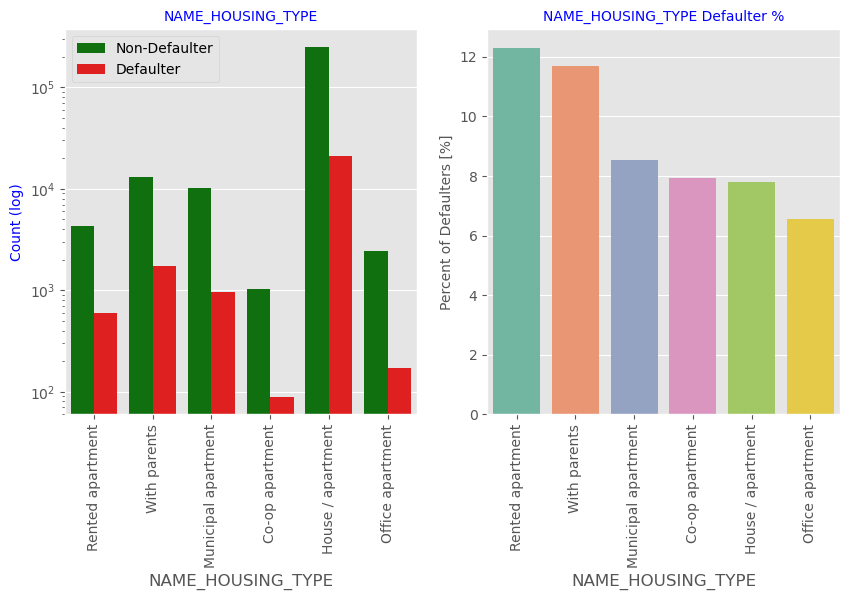

In [139]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

Notes - Majority of people live in House/apartment,
People living in office apartments have lowest default rate,
People living in rented apartments and with parents have higher probability of defaulting

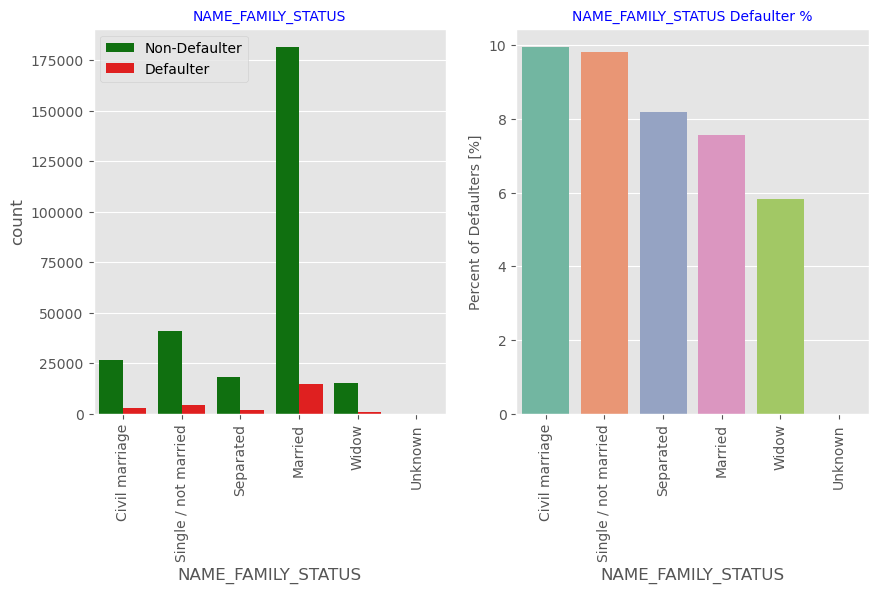

In [140]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

Notes - Most of the people who have taken loan are married, followed by Single/not married and civil marriage
In terms of defaulter percentage, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest.

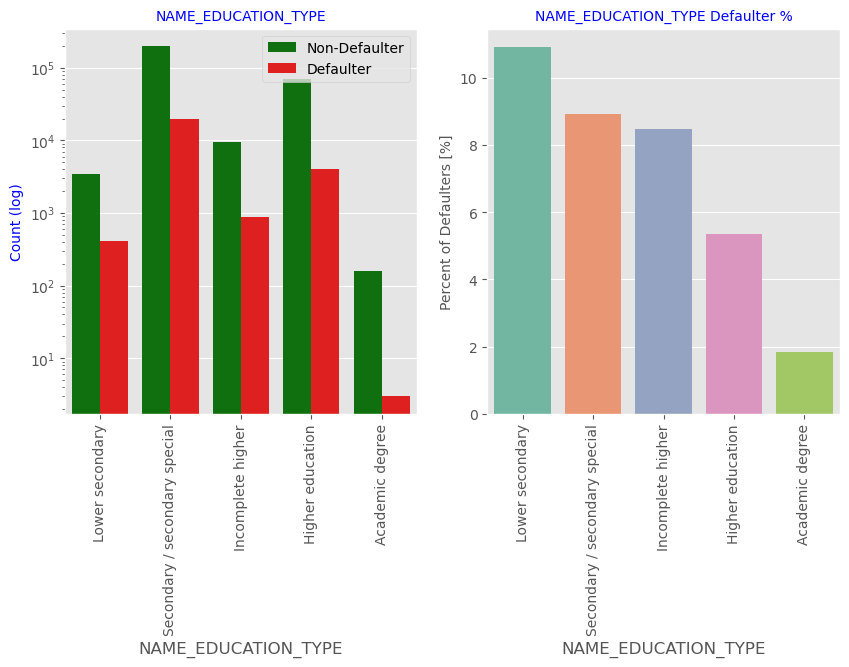

In [141]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

Notes - Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
The Lower secondary category, have the highest defaulter rate (11%) while the ones with Academic degree have the lowest defaulter rate.

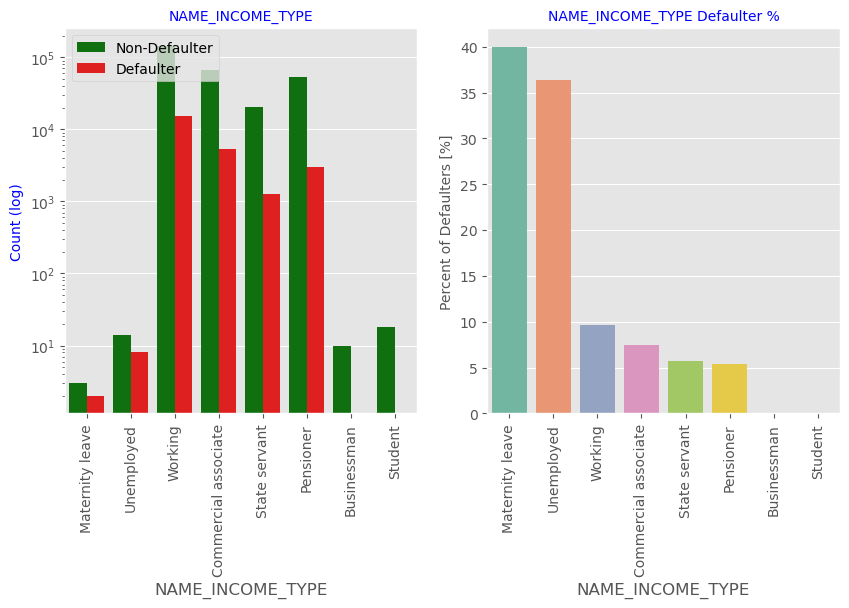

In [142]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,True)

Notes - Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
The applicants with income type as Maternity leave have highest defaulter rate (40%), followed by Unemployed (37%). The rest of the income types are under the average defaulter rate of 10%.
Student and Businessmen, though less in numbers do not have any default record.

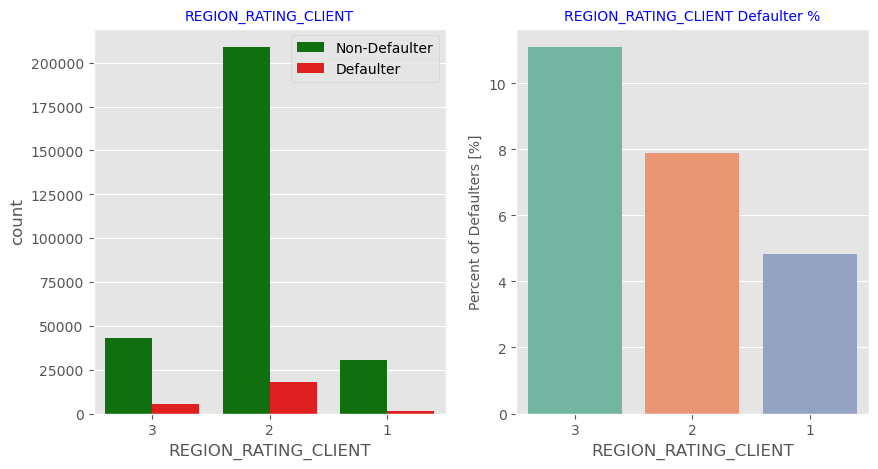

In [143]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

Notes - Most of the applicants are living in Region_Rating 2.
Region Rating 3 has the highest default rate.

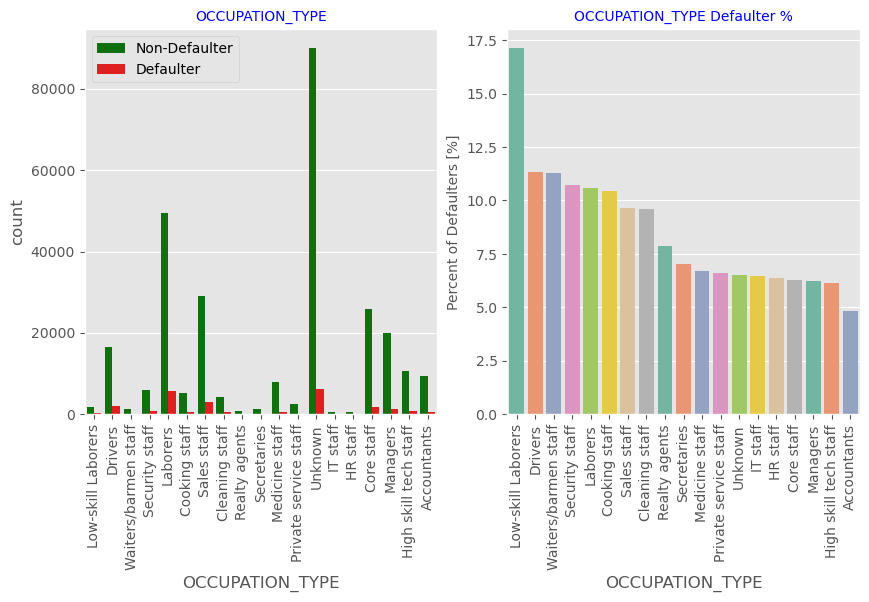

In [144]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,True)

Notes - Most of the loans are taken by Laborers, followed by Sales staff. IT staff & HR Staff take the lowest amount of loans.
Low-skill Laborers have the highest defaulter rate.

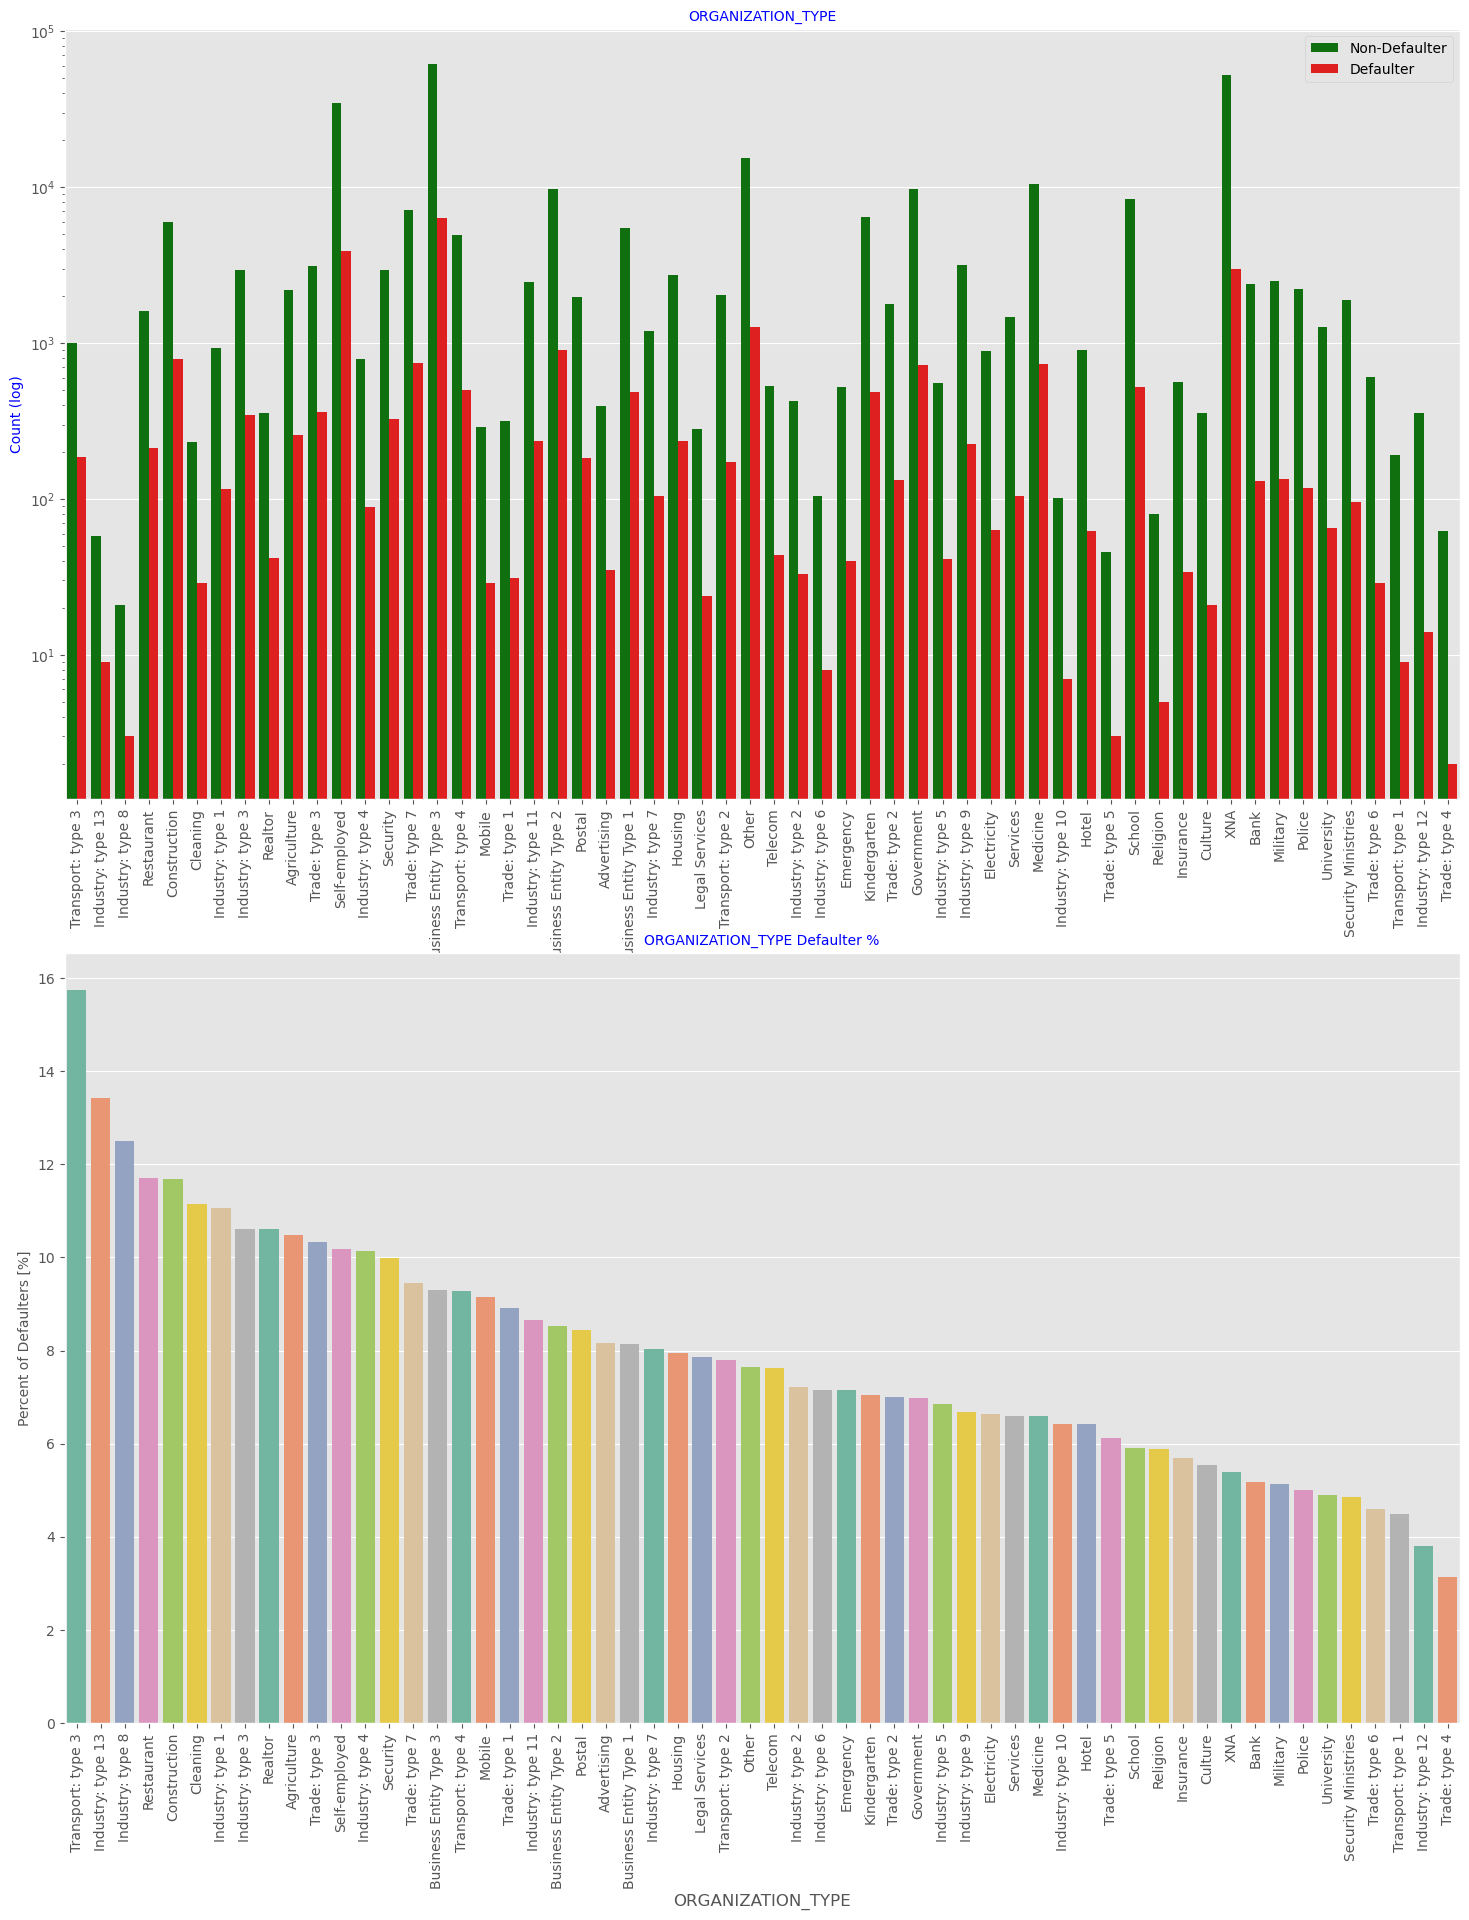

In [145]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

Notes - Business Entity Type 3 has the highest number of loan applications. 
Organizations having highest default rate are Transport: type 3, Industry: type 13, Industry: type 8, Restaurant and Construction.

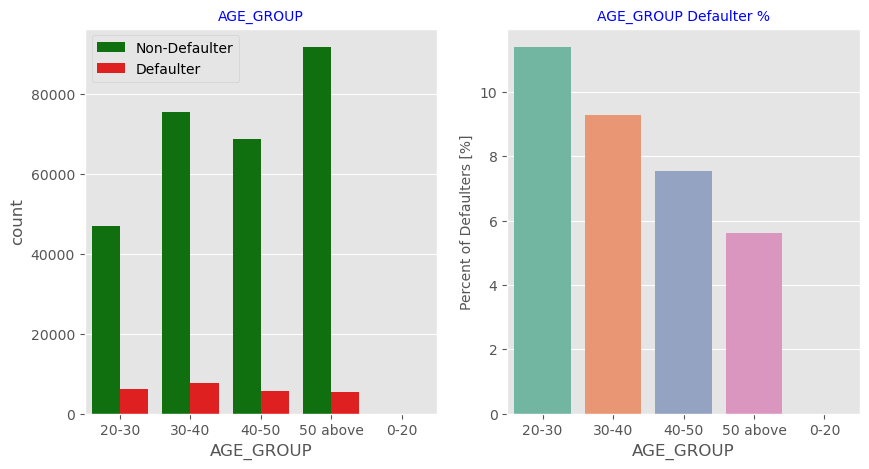

In [146]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP")

Notes - People above the age of 50 have the highest number of loan applications and low defaulting rate.
People in the age group range 20-40 have highest defaulting rate.

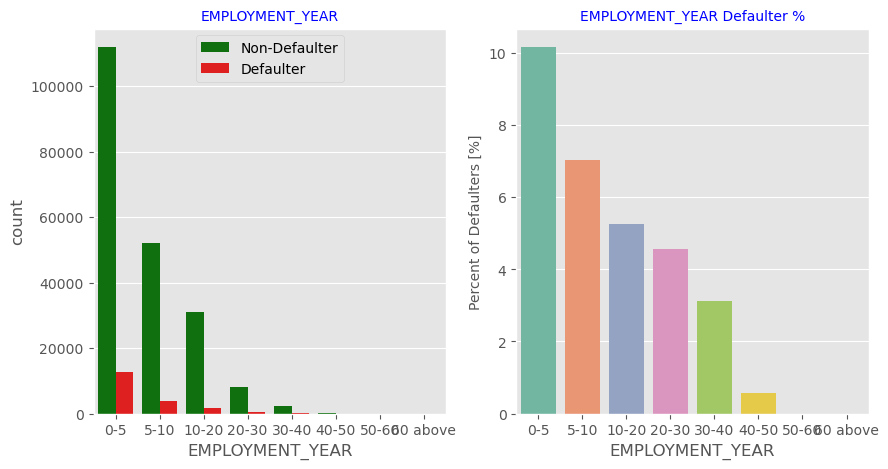

In [147]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR")

Notes - Majority of the applicants have been employed in between 0-5 years. The defaulter rate of this group is also the highest.
With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having lowest defaulter rate

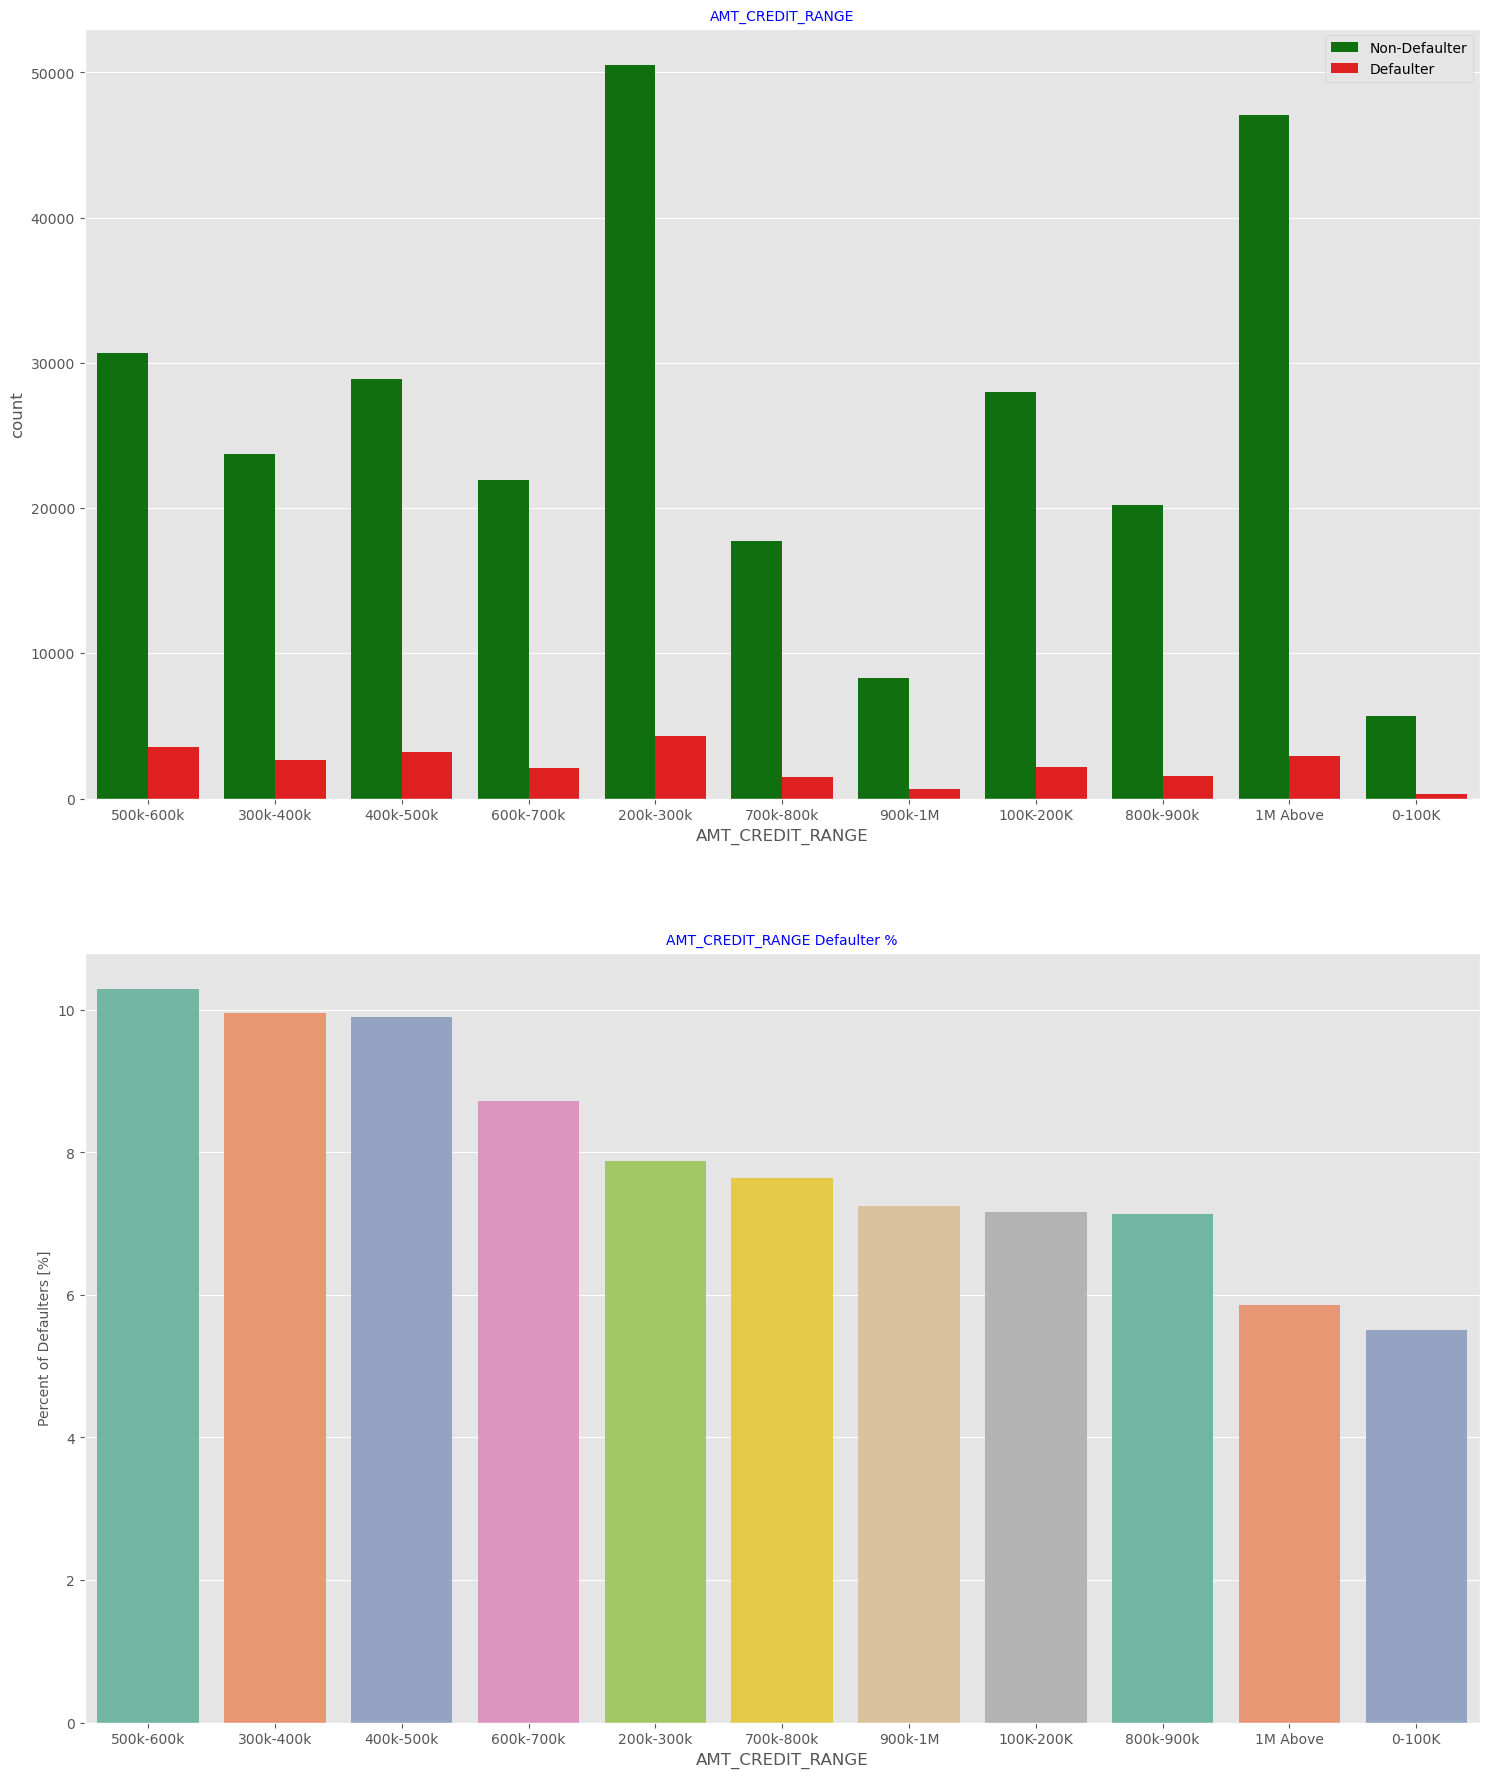

In [148]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

Notes - Highest number of loans are provided for amount 200-300k
People who get loan for 300-600k tend to default more than others.

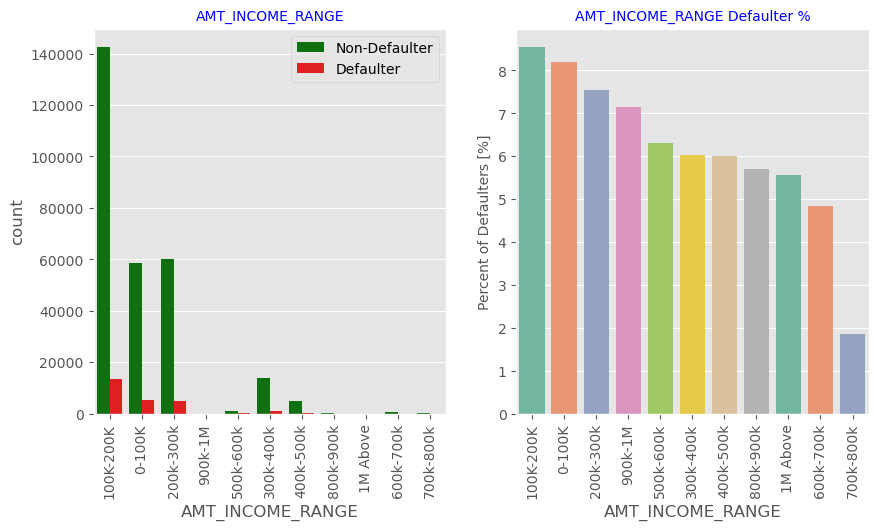

In [149]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,True,True)

Notes - Majority of the applicants have Income less than 300k, which also has the highest defaulter rate.
Applicants with Income more than 700k have lowest defaulter rate.

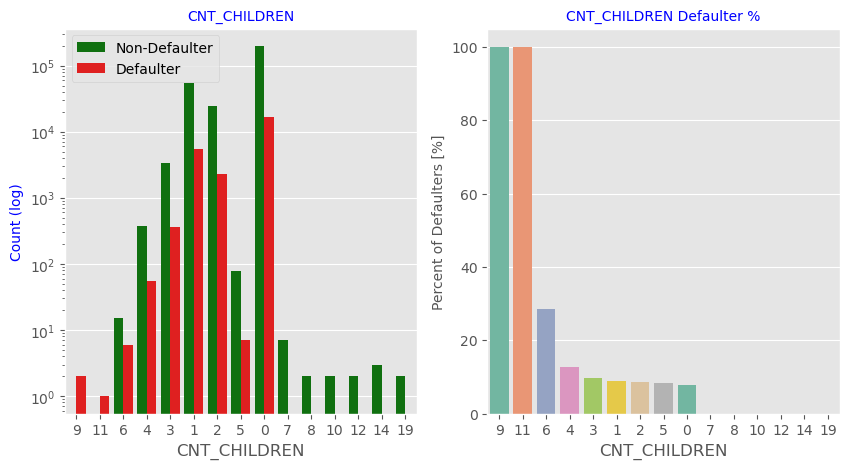

In [150]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

Notes - Most of the applicants do not have children and very few applicants have more than 3 children.
Applicants who have more than 4 children have high default rate with child count 9 and 11 showing 100% default rate

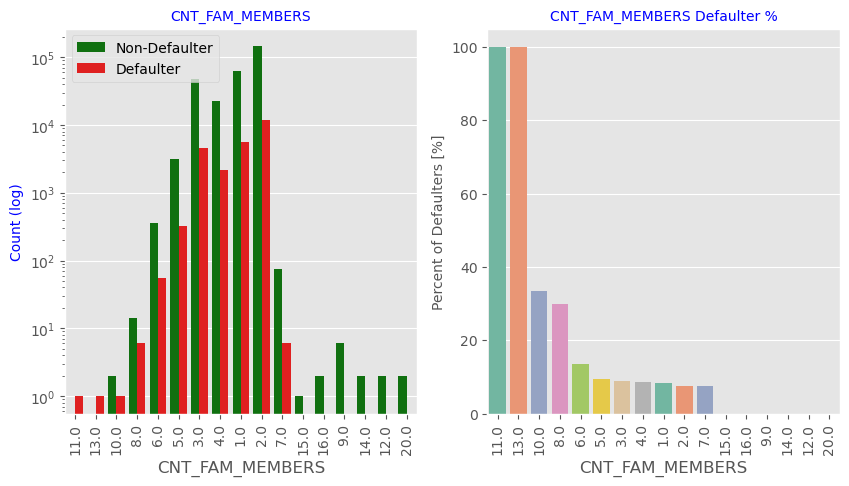

In [151]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True,True)

Notes - Family member follows the same trend as children where having more family members increases the risk of defaulting

#### Categorical Bi/Multivariate Analysis

In [152]:
df1.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


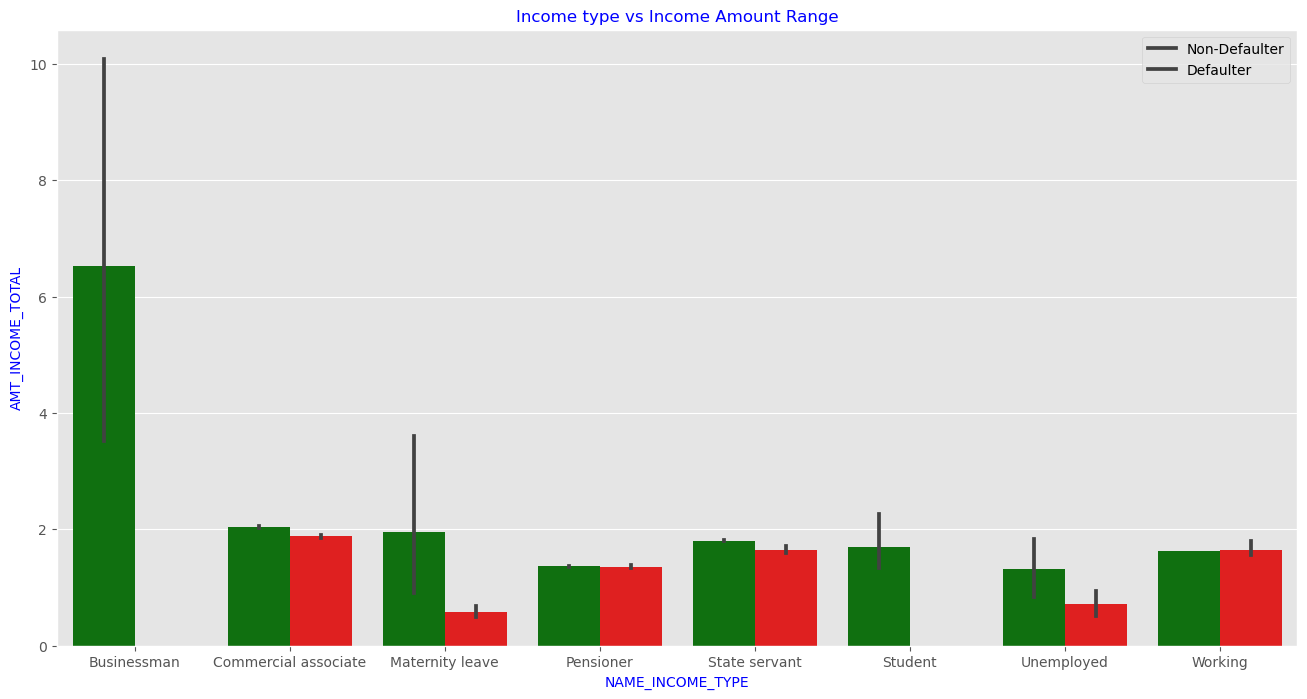

In [153]:
# Income type vs Income Amount Range
plt.figure(figsize = (16,8))
sns.barplot(x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL", data=df1, hue="TARGET", palette =['g','r'])     
        
plt.xlabel("NAME_INCOME_TYPE",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.ylabel("AMT_INCOME_TOTAL",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.title("Income type vs Income Amount Range", fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'}) 
plt.legend(labels = ['Non-Defaulter','Defaulter'])
plt.show()

Notes - Business man's income is the highest and the estimated range seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

#### Numerical Bivariate Analysis

<Figure size 1200x600 with 0 Axes>

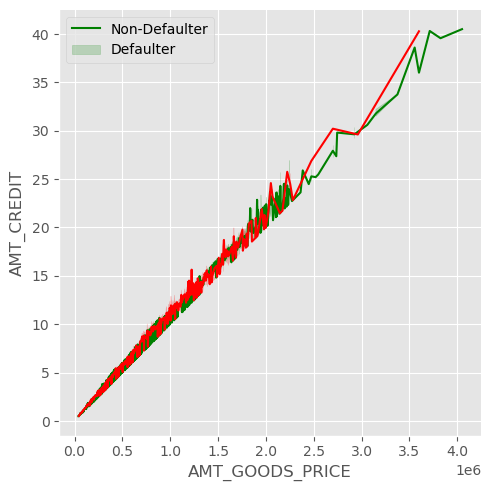

In [154]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
plt.figure(figsize=(12,6))
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=df1, hue="TARGET", kind= "line", palette = ['g','r'], legend = False)
plt.legend(['Non-Defaulter','Defaulter'])
plt.show()

Notes - When the credit amount goes beyond 3M, there is an increase in defaulters.

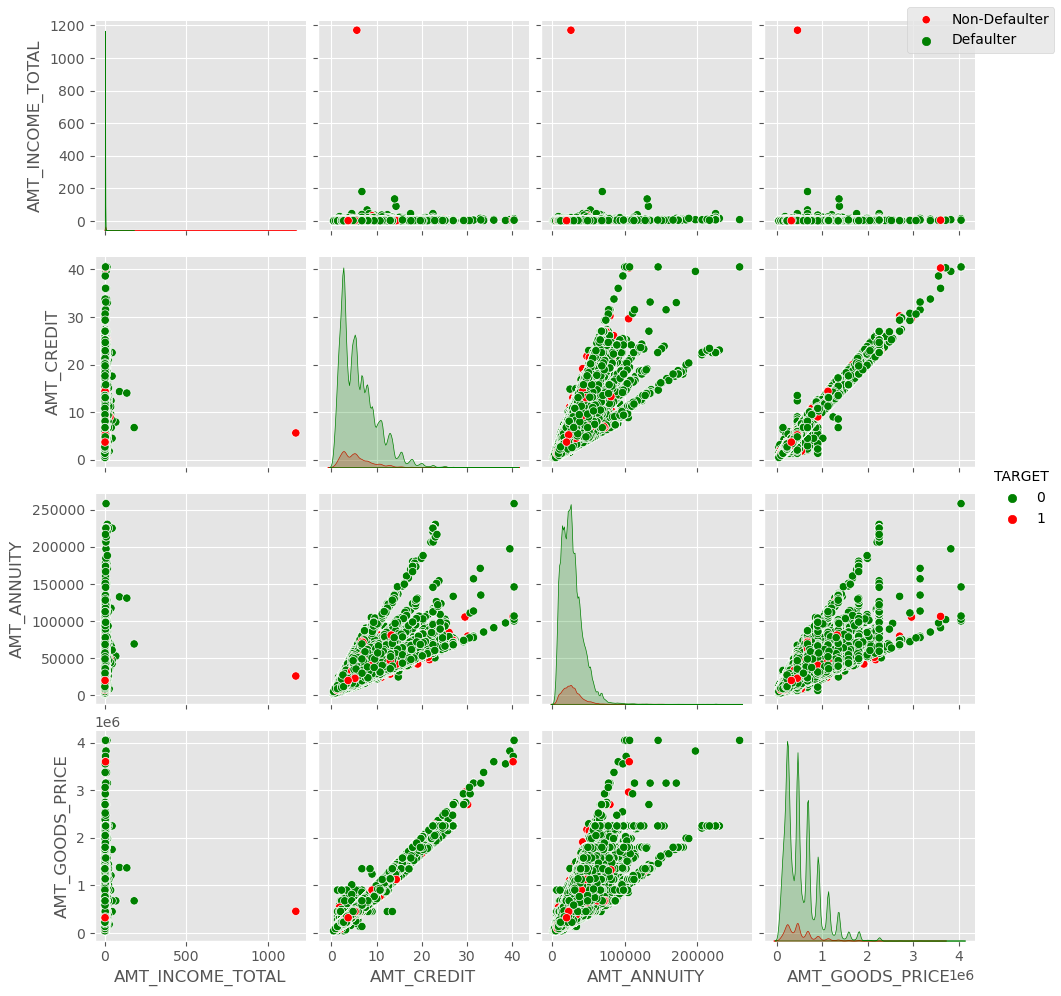

In [155]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Non-Defaulter','Defaulter'])
plt.show()

Notes - When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
There are very less defaulters for AMT_CREDIT >3M

#### Merged Dataframes Analysis

In [156]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
Merged_df = pd.merge(df1, df2, how='inner', on='SK_ID_CURR')
Merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [157]:
# Checking Dimensions for Merged Dataframe
Merged_df.shape

(1413701, 74)

In [158]:
Merged_df.size

104613874

In [159]:
# checking the columns and column types of the dataframe
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [160]:
# Checking merged dataframe numerical columns statistics
Merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701688e+04,5.276522e+05,2.074985e-02,1.632105e+04,7.266347e+04,...,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395072e+04,3.531028e+05,1.334702e-02,4.344557e+03,1.433374e+05,...,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,...,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,...,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,...,4.000000e+00,5.400000e+01,1.700000e+01,2.384012e+06,1.800000e+05,2.156400e+05,1.800000e+05,1.313000e+03,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,...,2.500000e+01,6.900000e+01,1.000000e+03,2.845381e+06,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [161]:
# Bifurcating the Merged dataframe based on Target value 0 and 1 for correlation and other analysis

M0 = Merged_df[Merged_df['TARGET']==0] # Non-Defaulters
M1 = Merged_df[Merged_df['TARGET']==1] # Defaulters

In [162]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df, hue= hue, palette= palette, order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

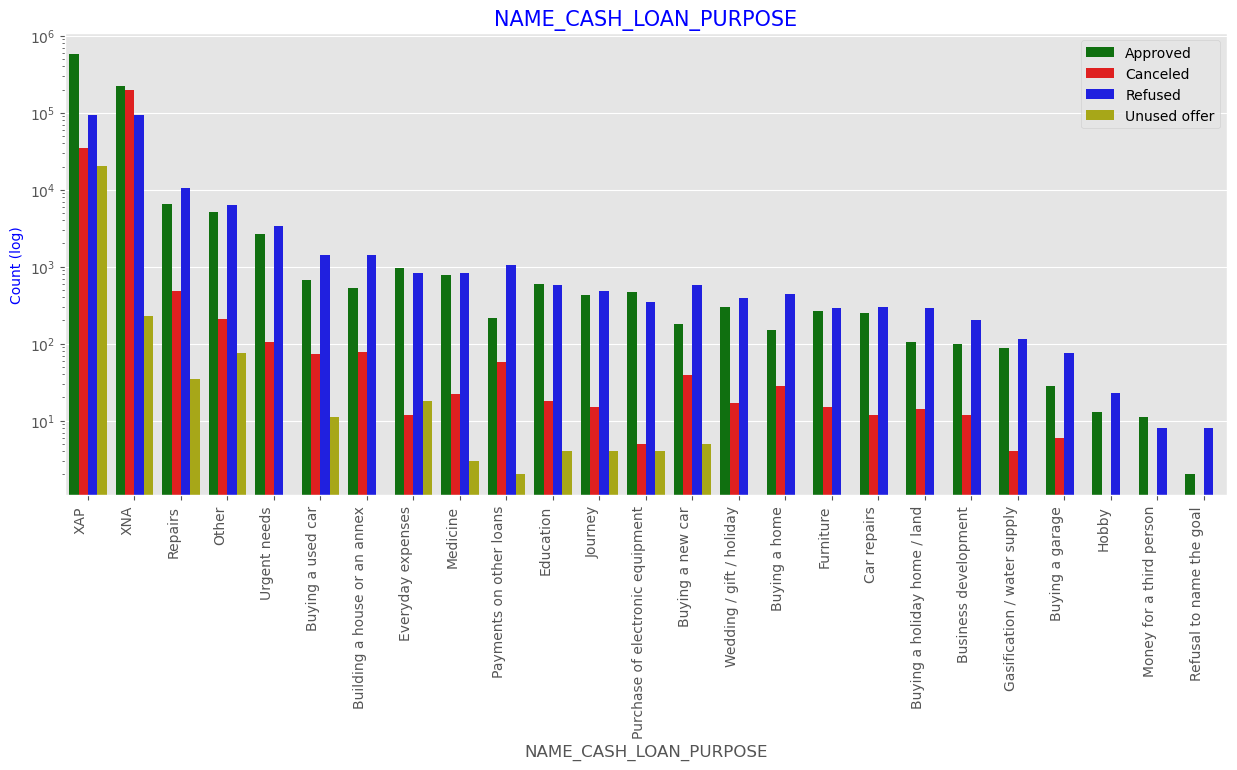

In [163]:
# Contract Status vs purpose of the loan for M0:
univariate_merged("NAME_CASH_LOAN_PURPOSE",M0,"NAME_CONTRACT_STATUS",["g","r","b","y"],True,(15,6))

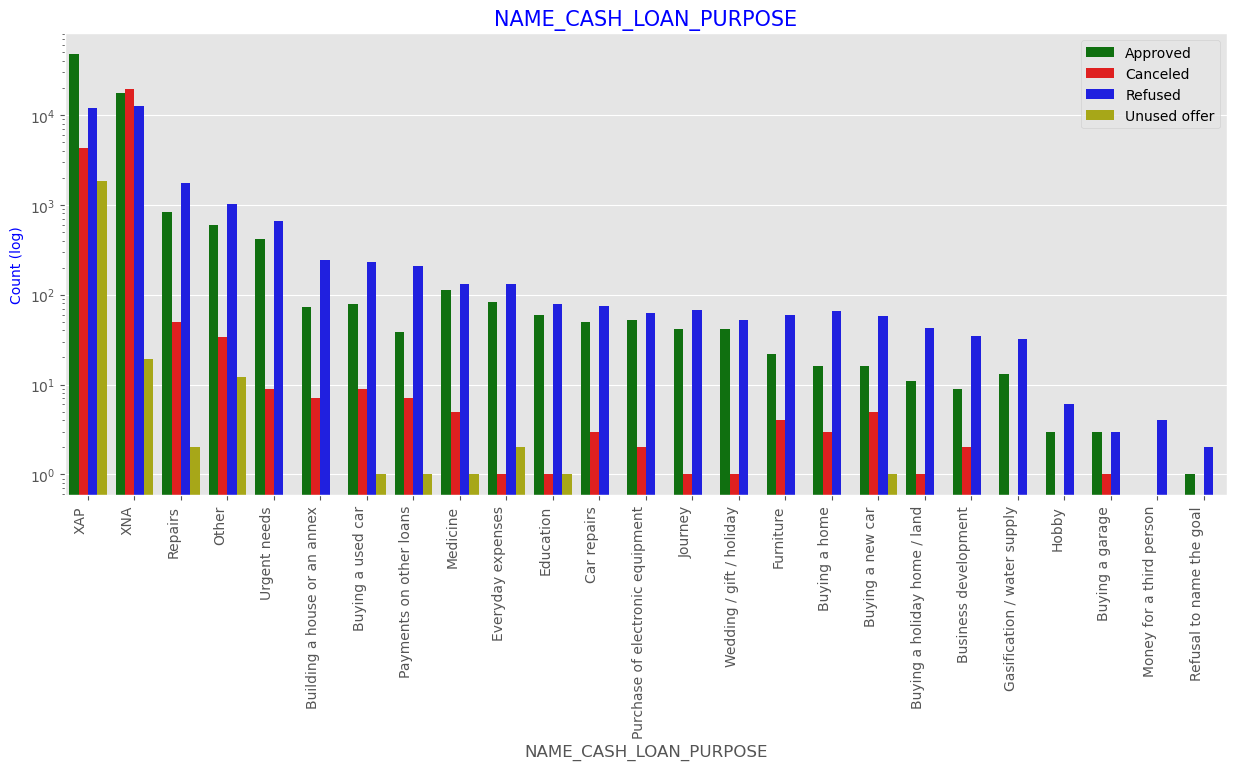

In [164]:
# Contract Status vs purpose of the loan for M1:
univariate_merged("NAME_CASH_LOAN_PURPOSE",M1,"NAME_CONTRACT_STATUS",["g","r","b","y"],True,(15,6))

Notes - Loan purpose has high number of unknown values (XAP, XNA)
Loan taken for the purpose of Repairs seems to have highest default rate
A very high number application have been rejected by bank or refused by client which has purpose as repairs or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

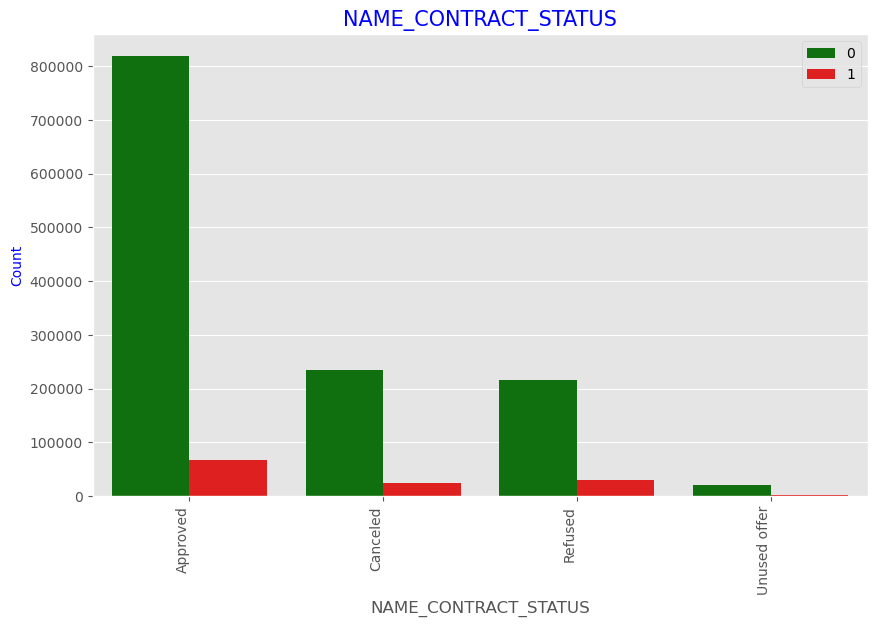

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [165]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",Merged_df,"TARGET",['g','r'],False,(10,6))
C = Merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
C_df = pd.concat([C.value_counts(),round(C.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
C_df['Percentage'] = C_df['Percentage'].astype(str) +"%"
print (C_df)

Notes - 90% of the previously cancelled client have repayed the loan. And 88% of the clients who have been previously refused a loan have payed back the loan.
Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

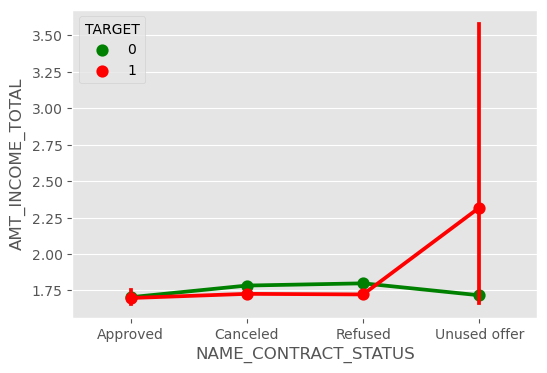

In [166]:
# plotting the relationship between income total and contract status
plt.figure(figsize=(6,4))
sns.pointplot(x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL", hue="TARGET", data= Merged_df, palette =['g','r'])

Notes - The point plot show that the applicants who have not used offer earlier have defaulted even when their average income is higher than others

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

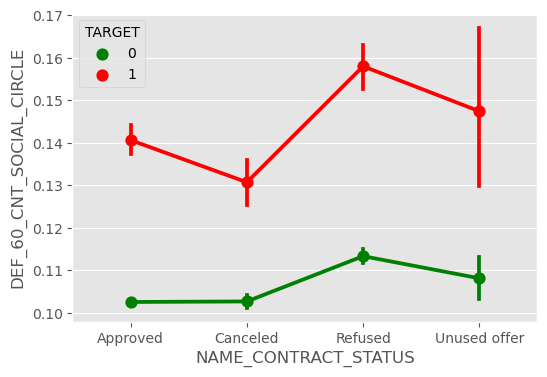

In [167]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contract status
plt.figure(figsize=(6,4))
sns.pointplot(x="NAME_CONTRACT_STATUS", y="DEF_60_CNT_SOCIAL_CIRCLE", hue="TARGET", data= Merged_df, palette =['g','r'])

Notes - Applicants who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

#### Conclusion:

- There are 8.07% of defaulters.
- Larger amount of Revolving loans, in comparison with their frequency, are not repaid.
- There are more loan applications from female clients and they are less likely to default.
- People living in rented apartments and with parents have higher probability of defaulting.
- Single and not married clients are more likely to default.
- People with Lower secondary education, have the highest defaulter rate while the ones with Academic degree have the lowest defaulter rate.
- People above the age of 50 are more likely to repay the loan on time, While People in the age group range 20-40 are more likely to default.
- Applicants who have more than 4 children are more likely to default
- A lot of the previously cancelled and refused clients have turned into repaying clients. Record the reason for cancellation or rejection which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
- Applicants who have higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more
